<div align="center">
    <H1>Aprendizado de Máquina - Trabalho Final</H1>
    <H3>Prof.º Daniel Roberto Cassar</H3> 
</div>

<br>

<div align="right">
    <H3>Guilda: Carcajus</H3>
    <H4>Aniel Souza Ribeiro Neto</H4>
    <H4>Caio Cogo Beriam</H4>
    <H4>Joaquim Junior Ferola Fonseca</H4>
</div>

<br> 

<div align="center">
    <img src="Imagens/carcajus_bg.png" width="500"/>
    <figcaption><H3><I>"Mastigar primeiro, digerir depois!"</I></H3></figcaption>

</div>

# Lore

    "    Você não ouviria o barulho das engrenagens se não tivessem te contado sobre elas. Você nunca saberia que elas estão rodando, centenas de metros sob seus pés, talvez até quilômetros. Mas elas estão ali, engrenadas e ativas como sempre. Elas são o trunfo do Continente, a ferramenta secreta de todo o povo para responder a Pergunta Final. E mesmo que não possamos ouvi-las com nossa audição, sentimos seu ritmo em nossos corações, pulsando junto conosco.   "

Os viajantes costumam dizer que o reino de Lumi é pequeno, mas ajeitadinho. É de fato inspirador andar pelos cenários característicos, como as praças, jardins e tavernas, e ver seus simpáticos habitantes recitando encantamentos, feitiços, magias e maldições.

O reino também é movido por um grande número de heróis *freelancers*, que recebem quests dos ilustres moradores já bem renomados. Alguns deles se unem em guildas, outros trabalham sozinhos; alguns cumprem missões com maestria, enquanto outros mal saem vivos.

Não posso dizer em qual desses grupos os Carcajus se encaixam. A verdade, é que estes são três paranóicos aventureiros que ambicionam moedas, pergaminhos, caixinhas de suco e outras coisinhas, para que depois possam gastar tudo em comida e bebida. Esse habitozinho ignóbil rendeu aos três o apelido de "glutões", que eles acolheram com orgulho e de bom-grado.

Entretanto, por sugestão de Edna Ensineide, notável conselheira real, os Glutões buscaram um novo nome em algum sinônimo mais respeitável. Assim, ao consultarem a Grande Enciclopédia dos Insultos e Injúrias na Biblioteca Real, verificaram que um dos nomes para um glutão é **Carcaju**, um pequeno e feroz animal que rivaliza com lobos e ursos pelo seu apetite insaciável.

Unidos, os Carcajus trabalham sob o lema **"Mastigar primeiro, digerir depois"**, que representa a voracidade do grupo de devorar grandes coisas em pequenas mordidas, e confiar piamente na própria capacidade de digestão para cumprir a tarefa.

O que eles não esperavam, é que nessa visita à biblioteca eles seriam atraídos para o temido **Pythonomicron**, um compêndio de maldições e informações proibidas do lado mais obscuro da magia. E ali, em uma página secreta, de baixo de um post-it de um estudante dedicado, encontraram rabiscada a lenda do Horripilante Processador Central, um mecanismo milenar que continha poder inimaginável, guardado por um dos mais poderosos magos do continente.

Agora, a quest de Milu Iluminarius MLVI era a pista que mais aproximava os Carcajus desse tesouro ancião. Mas para isso, eles teriam que conquistar a simpatia do rei e colecionar suas Coroas.

# Introdução

A área de nanotoxicologia, que estuda como nanomateriais interagem com sistemas biológicos, tem se tornado cada vez mais importante com os avanços da nanotecnologia, permitindo que esses materiais sejam implementados de maneira segura ao meio ambiente e aos possíveis seres vivos que venham a entrar em contato com esses nanomateriais. Entretanto, como outras características dos nanomateriais, sua toxicidade pode variar muito conforme a morfologia do composto, assim, para ser analisada corretamente uma série de fatores devem ser levados em consideração, o que torna difícil a previsão da toxicidade dos materiais. 

Sob essa perspectiva, nosso trabalho tem o objetivo de facilitar esse tarefa através do treinamento de um modelo de Aprendizado de Máquina Supervisionado capaz de prever se uma nanopartícula é tóxica com base em características da sua morfologia. Para isso, utilizaremos como fundamento um conjunto de dados contendo as características de diversas nanoparticulas e se elas são ou não tóxicas. O dataset foi elaborado pelo trabalho Subramanian NA, Palaniappan A. NanoTox: Development of a Parsimonious In Silico Model for Toxicity Assessment of Metal-Oxide Nanoparticles Using Physicochemical Features. ACS Omega 2021, 6, 17, 11729–11739 doi:10.1021/acsomega.1c01076, e o obtivemos pela plataforma Kaggle através do endereço https://www.kaggle.com/datasets/apalania/toxicityassessment-meoxnp.

Para fins de organização e didática, este trabalho será dividido nas seguintes etapas:
1. Preparo dos dados: Nessa seção será feita a obtenção e tratamento dos dados, permitindo que eles sejam posteriormente utilizados sem problemas, além disso, será feita também a divisão dos dados de treino e de teste dos modelos;
2. Estudo dos modelos: Nessa etapa faremos o estudo de 5 modelos através do módulo optuna para optimzação de hiperparâmetros e estratégias de normalização de dados e tratamento de atributos, buscando o melhor pipeline encontrado pelo optuna para cada modelo;
3. Teste dos modelos: Após definirmos os melhores pipelines encontrados pelo optuna, iremos instânciar, treinar e comparar os 5 pipelines em busca do de melhor desempenho, que, por fim, utilizaremos para prever os dados de teste;
4. Resultados e conclusão: Enfim, discutiremos os resultados obtidos pelo trabalho e apresentaremos sua conclusão.

# Módulos utilizados

In [1]:
import pandas as pd

# Modelos de Aprendizado Supervisionado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Pipeline
from sklearn.pipeline import make_pipeline

# Tratamento
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


# Separação de dados
from sklearn.model_selection import train_test_split

# Validação Cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from optuna import create_study

# Visualização dos resultados
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pprint import pprint

C:\Users\joaquim25018\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preparo dos dados


Nesta seção será realizado o tratamento dos dados, preparando-os para serem usados para treino e subsequente avaliação dos modelos que serão estudados. O processo de tratamento de dados é fundamental para a prática de ciência de dados e aprendizado de máquina, dados bem tratados podem impulsionar fortemente o desempenho de modelos e evitar problemas nos seus treinos, além disso, boas práticas ao lidar com dados permitem evitar o vazamento de dados e facilitam o trabalho. 

Sobre essa perspectiva, nesta seção será feita a importação dos dados do dataset através do módulo pandas, o tratamento dos dados, removendo dados que sem informação e codificando dados categóricos para que os modelos possam os interpretar, e por fim a divisão dos dados para treino e teste dos modelos. 

## Importando o dataset

In [2]:
df = pd.read_csv("nanotox_dataset.csv")
df

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic
...,...,...,...,...,...,...,...,...,...,...,...
876,ZnO,45.3,310.0,32.7,21.3,-3.89,24,20.000,1.65,1,Toxic
877,ZnO,32.0,1093.0,21.6,37.0,-3.89,24,25.000,1.65,1,Toxic
878,ZnO,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,Toxic
879,ZnO,35.6,295.5,-41.6,27.9,-3.89,24,10.000,1.65,1,Toxic


## Tratamento dos dados [ALTERAR]

O tratamento de dados deste trabalho consisitirá no seguinte processo: Remoção de dados faltantes, comuns em diversos datasets não tratados e que atrapalham o treino dos modelos; Remoção de linhas duplicadas, que, apesar de não impedirem o funcionamento do modelo, trazem uma redundância nos dados, influênciando a percepção do modelo sobre os dados; Codificação one-hot dos atributos categóricos, permitindo que os modelos interpretem esses dados; Remoção de colunas sem variância, uma vez que colunas sem variância não trazem qualquer informação ao modelo, não há padrões a serem inferidos em algo que não varia; Tranformação do target para forma numérica, permitindo o seu uso sem problemas de alguns modelos e estatíticas de teste. 

### $\bullet$ Removendo linhas com dados faltantes ou duplicados

In [3]:
# Removendo linhas com valores NaN
df = df.dropna()
# Removendo linhas duplicadas
df = df.drop_duplicates()

### $\bullet$ Restringindo dados às nanopartículas de ZnO

* Identificando as linhas com NPs de ZnO:

In [4]:
# Encontrando as linhas com NPs de ZnO
logica = df["NPs"] == "ZnO"
df = df.loc[logica]

# Removendo coluna NPs
df = df.drop("NPs", axis=1)

df

,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
249,45.3,310.0,32.7,21.3,-3.89,24,0.001,1.65,1,nonToxic
250,45.3,310.0,32.7,21.3,-3.89,24,0.010,1.65,1,nonToxic
251,45.3,310.0,32.7,21.3,-3.89,24,0.100,1.65,1,nonToxic
252,45.3,310.0,32.7,21.3,-3.89,24,1.000,1.65,1,nonToxic
253,45.3,310.0,32.7,21.3,-3.89,24,5.000,1.65,1,nonToxic
...,...,...,...,...,...,...,...,...,...,...
636,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,Toxic
679,46.3,239.0,42.8,24.1,-5.17,24,10.000,1.90,1,Toxic
690,46.3,239.0,42.8,24.1,-5.17,12,50.000,1.90,1,Toxic
713,46.3,239.0,42.8,24.1,-5.17,24,50.000,1.90,1,Toxic


### $\bullet$ Removendo colunas com variância 0

In [5]:
# Instânciando o VarianceThreshold 
threshold = VarianceThreshold(threshold=0.0)
# Ajustando o modelo e transformando os dados
threshold.fit_transform(df.loc[:, df.dtypes != 'object'])

df

,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
249,45.3,310.0,32.7,21.3,-3.89,24,0.001,1.65,1,nonToxic
250,45.3,310.0,32.7,21.3,-3.89,24,0.010,1.65,1,nonToxic
251,45.3,310.0,32.7,21.3,-3.89,24,0.100,1.65,1,nonToxic
252,45.3,310.0,32.7,21.3,-3.89,24,1.000,1.65,1,nonToxic
253,45.3,310.0,32.7,21.3,-3.89,24,5.000,1.65,1,nonToxic
...,...,...,...,...,...,...,...,...,...,...
636,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,Toxic
679,46.3,239.0,42.8,24.1,-5.17,24,10.000,1.90,1,Toxic
690,46.3,239.0,42.8,24.1,-5.17,12,50.000,1.90,1,Toxic
713,46.3,239.0,42.8,24.1,-5.17,24,50.000,1.90,1,Toxic


### $\bullet$ Tranformando o target para a forma numérica

In [6]:
df["class"] = df["class"].map({'nonToxic': 0, 'Toxic': 1})

df

,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
249,45.3,310.0,32.7,21.3,-3.89,24,0.001,1.65,1,0
250,45.3,310.0,32.7,21.3,-3.89,24,0.010,1.65,1,0
251,45.3,310.0,32.7,21.3,-3.89,24,0.100,1.65,1,0
252,45.3,310.0,32.7,21.3,-3.89,24,1.000,1.65,1,0
253,45.3,310.0,32.7,21.3,-3.89,24,5.000,1.65,1,0
...,...,...,...,...,...,...,...,...,...,...
636,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,1
679,46.3,239.0,42.8,24.1,-5.17,24,10.000,1.90,1,1
690,46.3,239.0,42.8,24.1,-5.17,12,50.000,1.90,1,1
713,46.3,239.0,42.8,24.1,-5.17,24,50.000,1.90,1,1


### $\bullet$ Definindo labels

In [7]:
ordem_labels = ["Não tóxico", "Tóxico"]

## Separando os dados para treino e teste

A separação de dados em treino e teste é uma forma de avaliar o desempenho dos modelos sem serem necessárias novas observações. Ela consiste em omitir um fração dos dados no treino do modelo, utilizando apenas o restante dos dados para treino do modelo. Os dados de teste devem sempre ser utilizados somente quando todo o processo de treino e otimização dos modelos tiver sido concluído e o modelo final ter sido escolhido, para evitar o vazamento de dados do conjunto de teste, o que traria um enviesamento do modelo e faria com que o teste não fosse uma boa estimativa do desempenho do modelo. 

In [8]:
# Definindo a semente aleatória
semente = 3931421

# Definindo a lista de atributos
atributos = df.drop(columns=["class"])
# Definindo o target
target = df["class"]

# Realizando a separação dos dados 
x_treino, x_teste, y_treino, y_teste = train_test_split(
    atributos,
    target,
    test_size=0.1,
    random_state=semente,
    stratify=df["class"]
)

# Estudos dos modelos 

Nessa etapa será utilizada o módulo optuna para optimização de hiperparâmetros e escolha de estratégias de normalização dos dados para 5 modelos: Um KNN, uma SVM, uma Regressão Logística, uma DecisionTree e uma RandomForest, todos de classificação e da biblioteca scikit-learn. Para cada modelo mencionado, o processo realizado seguirá o seguinte fluxo: 
1. Criar a função para instanciar os modelos: A função que possui os critérios que o optuna testará, retornando o modelo com os parâmetros definidos pelo optuna.
2. Criar a função que será otimizada pelo optuna: A função que computará a métrica a ser minimizada ou maximizada pelo optuna.
3. Criar um estudo do optuna: Arquivo onde serão salvos os testes e resultados do optuna.
4. Indicar testes desejados: Indicar testes com valores específicos que desejamos que o optuna teste.
5. Criar a função objetivo parcial: Função que retorna a função a ser otimizada, necessária para o optuna.
6. Rodar o optuna e otimizar os parâmetros.

Vamos entender um pouco mais a fundo cada uma das etapas, lembrando que serão realizadas para cada um dos modelos: 
1. A primeira etapa é a criação de uma função que possui em seu corpo opções de escolha que serão testadas pelo optuna. Neste trabalho, cada um dos modelos terá uma função que testa diferentes valores para seus hiperparâmetros, que sejam relevantes, que serão salvos em um dicionário para serem utilizados para instanciar os modelos posteriormente. Depois, o optuna poderá escolher entre normalizar ou não dados, seguindo as normalizações padrão, por mínimos e máximos ou máximo absoluto, e também poderá escolher entre aplicar ou não estratégias de redução de dimensionalidade ou seleção de atributos, adicionando as estratégias escolhidas a uma lista de passos para a criação de um pipeline. Por fim, será instânciado um modelo com os parâmetros definidos e criaremos um pipeline com os passos de tratamento de dados, caso escolhidos pelo optuna, e o modelo instanciado, que será retornado pela função.

2. Aqui será criada uma função que chama a função para instanciar o modelo e testa o modelo criado através de uma validação cruzada seguindo uma estratégia de kfold estratificado com 3 folds e métrica accuracy. A função retorna o desempenho médio do modelo.

3. Criaremos nessa etapa o estudo do optuna, que gera um arquivo contendo os dados obtidos pela otimização que será feita posterioremente, caso já haja um arquivo do estudo ele será lido ao invés de outro ser criado. Nesse ponto, caso deseje utilizar os resultados já obtidos basta baixar os estudos apresentados no repositório deste trabalho no github. O estudo irá buscar maximizar o valor recebido pela função objetivo ao longo das iterações.

4. Agora indicaremos alguns casos particulares que desejamos analisar. Vamos indicar que o optuna teste ao menos uma vez cada caso de normalização e tratamento de dados com os parâmetros base do sklearn.

5. O optuna requer que a função objetivo seja chamada por uma outra função, portanto, criamos uma função que retorna a função objetivo com o trial do optuna.

6. Por fim, faremos otimização de parâmetros pelo optuna. Note que a linha que faz essa etapa está na forma de comentário por padrão pois considera que os estudos disponibilizados no repositório tenham sido baixados, caso tenha optado por não baixar os estudos ou tenha interesse em fazer mais estudos, basta remover a hashtag `#` no início da linha para realizar a otimização.

## Otimizando um modelo K-NearestNeighbors Classifier 

### $\bullet$ Criando a Função para Instanciar o Modelo



In [9]:
def instanciador_knn(trial): 
    """Recebe um trial do optuna e retorna uma instância de um modelo com classificador KNN"""

    # Definindo os parâmetros do modelo 
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 200, log=True),
        "p": trial.suggest_int("p", 1, 2),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"])
    }

    # Lista de etapas para o pipeline 
    steps = []

    # Definindo a estratégia de normalização 
    normalization = trial.suggest_categorical("normalization", [None, "standard", "minmax", "maxabs"])

    # Adiciona normalização padrão
    if normalization == "standard": 
        steps.append(StandardScaler())
    # Adiciona normalização por máximos e mínimos
    elif normalization == "minmax": 
        steps.append(MinMaxScaler())
    # Adiciona normalização por máximo absoluto
    elif normalization == "maxabs": 
        steps.append(MaxAbsScaler())

    # Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
    treatment = trial.suggest_categorical("treatment", [None, "pca"])

    # Adiciona tratamento PCA 
    if treatment == "pca": 
        # Definindo o número de componentes a serem mantidas pelo pca
        components = trial.suggest_int("pca_components", 2, 9)
        steps.append(PCA(n_components=components))

    # Instânciando o modelo
    modelo = KNeighborsClassifier(**params)
    steps.append(modelo)

    # Criando o pipeline
    pipeline = make_pipeline(*steps)

    return pipeline

### $\bullet$ Criando a função objetivo do optuna

In [10]:
def funcao_objetivo_knn(trial, X_treino, Y_treino): 
    """Função a ser otimizada pelo Optuna"""
    # Instânciando o modelo 
    modelo = instanciador_knn(trial)

    kf = StratifiedKFold(3, shuffle=True, random_state=semente)
    
    # Avaliando o modelo por Validação cruzada 
    metrica = cross_val_score(
        modelo, 
        X_treino, 
        Y_treino, 
        scoring="accuracy", 
        cv=kf
    )

    return metrica.mean()

### $\bullet$ Criando um Estudo do Optuna

In [11]:
# Criando o estudo
study_knn = create_study(
    # Tipo de otimização
    direction="maximize",
    # Nome do estudo 
    study_name="Estudo KNN",
    # Salvando o estudo em um arquivo
    storage=f"sqlite:///{"Estudo KNN"}.db",
    # Recupera o progresso salvo do estudo
    load_if_exists=True,
)

[I 2025-11-03 08:36:07,354] A new study created in RDB with name: Estudo KNN


### $\bullet$ Determinando testes desejados

In [12]:
# Modelo base sem tratamentos
study_knn.enqueue_trial(
    {
        "n_neighbors": 5, 
        "p": 2, 
        "weights": "uniform", 
        "normalization": None,
        "treatment": None
    }
)

# Modelo base com normalização padrão 
study_knn.enqueue_trial(
    {
        "n_neighbors": 5, 
        "p": 2, 
        "weights": "uniform", 
        "normalization": "standard",
        "treatment": None
    }
)

# Modelo base com normalização por mínimos e máximos 
study_knn.enqueue_trial(
    {
        "n_neighbors": 5, 
        "p": 2, 
        "weights": "uniform", 
        "normalization": "minmax",
        "treatment": None
    }
)

# Modelo base com normalização por máximo absoluto
study_knn.enqueue_trial(
    {
        "n_neighbors": 5, 
        "p": 2, 
        "weights": "uniform", 
        "normalization": "maxabs",
        "treatment": None
    }
)

# Modelo base com normalização padrão e PCA
study_knn.enqueue_trial(
    {
        "n_neighbors": 5, 
        "p": 2, 
        "weights": "uniform", 
        "normalization": "standard",
        "treatment": "pca",
        "pca_components": 9
    }
)



### $\bullet$ Criando a Função Objetivo Parcial

In [13]:
def parcial_knn(trial): 
    """Função que retorna a função objetivo"""
    return funcao_objetivo_knn(trial, x_treino, y_treino)


### $\bullet$ Otimizando os parâmetros 

In [14]:
study_knn.optimize(parcial_knn, 100)

[I 2025-11-03 08:36:07,628] Trial 0 finished with value: 0.713276836158192 and parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'normalization': None, 'treatment': None}. Best is trial 0 with value: 0.713276836158192.
[I 2025-11-03 08:36:07,756] Trial 1 finished with value: 0.7695856873822975 and parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'normalization': 'standard', 'treatment': None}. Best is trial 1 with value: 0.7695856873822975.
[I 2025-11-03 08:36:07,977] Trial 2 finished with value: 0.7584745762711865 and parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'normalization': 'minmax', 'treatment': None}. Best is trial 1 with value: 0.7695856873822975.
[I 2025-11-03 08:36:08,103] Trial 3 finished with value: 0.7526365348399247 and parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'normalization': 'maxabs', 'treatment': None}. Best is trial 1 with value: 0.7695856873822975.
[I 2025-11-03 08:36:08,242] Trial 4 finished with value: 0.7

### $\bullet$ Resultados

In [15]:
resultado_knn = study_knn.best_trial
print(f"Número do melhor trial: {resultado_knn.number}")
print(f"Parâmetros do melhor trial: {resultado_knn.params}")

Número do melhor trial: 4
Parâmetros do melhor trial: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'normalization': 'standard', 'treatment': 'pca', 'pca_components': 9}


## Otimizando um modelo Support Vector Machine Classifier 

### $\bullet$ Criando a Função para Instanciar o Modelo

In [16]:
def instanciador_svc(trial): 
    """Recebe um trial do optuna e retorna uma instância de um modelo com classificador SVC"""

    # Definindo os parâmetros do modelo 
    params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),  
            "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
            "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
            "degree": trial.suggest_int("degree", 1, 5), 
            "coef0": trial.suggest_float("coef0", 0.0, 1.0), 
            "max_iter": 10000,
        }

    # Lista de etapas para o pipeline 
    steps = []

    # Definindo a estratégia de normalização 
    normalization = trial.suggest_categorical("normalization", [None, "standard", "minmax", "maxabs"])

    # Adiciona normalização padrão
    if normalization == "standard": 
        steps.append(StandardScaler())
    # Adiciona normalização por máximos e mínimos
    elif normalization == "minmax": 
        steps.append(MinMaxScaler())
    # Adiciona normalização por máximo absoluto
    elif normalization == "maxabs": 
        steps.append(MaxAbsScaler())

    # Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
    treatment = trial.suggest_categorical("treatment", [None, "pca"])

    # Adiciona tratamento PCA 
    if treatment == "pca": 
        # Definindo o número de componentes a serem mantidas pelo pca
        components = trial.suggest_int("pca_components", 2, 9)
        steps.append(PCA(n_components=components))

    # Instânciando o modelo
    modelo = SVC(**params)
    steps.append(modelo)

    # Criando o pipeline
    pipeline = make_pipeline(*steps)

    return pipeline

### $\bullet$ Criando a função objetivo do optuna

In [17]:
def funcao_objetivo_svc(trial, X_treino, Y_treino): 
    """Função a ser otimizada pelo Optuna"""
    # Instânciando o modelo 
    modelo = instanciador_svc(trial)

    kf = StratifiedKFold(3, shuffle=True, random_state=semente)
    
    # Avaliando o modelo por Validação cruzada 
    metrica = cross_val_score(
        modelo, 
        X_treino, 
        Y_treino, 
        scoring="accuracy", 
        cv=kf
    )

    return metrica.mean()

### $\bullet$ Criando um estudo do optuna

In [18]:
# Criando o estudo
study_svc = create_study(
    # Tipo de otimização
    direction="maximize",
    # Nome do estudo 
    study_name="Estudo SVC",
    # Salvando o estudo em um arquivo
    storage=f"sqlite:///{"Estudo SVC"}.db",
    # Recupera o progresso salvo do estudo
    load_if_exists=True,
)

[I 2025-11-03 08:36:28,052] A new study created in RDB with name: Estudo SVC


### $\bullet$ Determinando testes desejados 

In [19]:
# Modelo base sem tratamentos
study_svc.enqueue_trial(
    {
        "C": 1,  
        "kernel": "rbf",
        "gamma": "scale",
        "degree": 3, 
        "coef0": 0.0, 
        "normalization": None,
        "treatment": None
    }
)

# Modelo base com normalização padrão
study_svc.enqueue_trial(
    {
        "C": 1,  
        "kernel": "rbf",
        "gamma": "scale",
        "degree": 3, 
        "coef0": 0.0, 
        "normalization": "standard",
        "treatment": None
    }
)


# Modelo base com normalização por mínimos e máximos 
study_svc.enqueue_trial(
    {
        "C": 1,  
        "kernel": "rbf",
        "gamma": "scale",
        "degree": 3, 
        "coef0": 0.0, 
        "normalization": "minmax",
        "treatment": None
    }
)

# Modelo base com normalização por máximo absoluto
study_svc.enqueue_trial(
    {
        "C": 1,  
        "kernel": "rbf",
        "gamma": "scale",
        "degree": 3, 
        "coef0": 0.0, 
        "normalization": "maxabs",
        "treatment": None
    }
)

# Modelo base com normalização padrão e PCA
study_svc.enqueue_trial(
    {
        "C": 1,  
        "kernel": "rbf",
        "gamma": "scale",
        "degree": 3, 
        "coef0": 0.0, 
        "normalization": "standard",
        "treatment": "pca",
        "pca_components": 9
    }
)


### $\bullet$ Criando a Função Objetivo Parcial

In [20]:
def parcial_svc(trial): 
    """Função que retorna a função objetivo"""
    return funcao_objetivo_svc(trial, x_treino, y_treino)


### $\bullet$ Otimizando os parâmetros 

In [21]:
study_svc.optimize(parcial_svc, 100)

[I 2025-11-03 08:36:28,310] Trial 0 finished with value: 0.6573446327683615 and parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.0, 'normalization': None, 'treatment': None}. Best is trial 0 with value: 0.6573446327683615.
[I 2025-11-03 08:36:28,445] Trial 1 finished with value: 0.8032956685499059 and parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.0, 'normalization': 'standard', 'treatment': None}. Best is trial 1 with value: 0.8032956685499059.
[I 2025-11-03 08:36:28,588] Trial 2 finished with value: 0.7977401129943503 and parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.0, 'normalization': 'minmax', 'treatment': None}. Best is trial 1 with value: 0.8032956685499059.
[I 2025-11-03 08:36:28,726] Trial 3 finished with value: 0.7751412429378531 and parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0.0, 'normalization': 'maxabs', 'treatment': None}. Best is trial 1 wi

### $\bullet$ Resultados

In [22]:
resultado_svc = study_svc.best_trial
print(f"Número do melhor trial: {resultado_svc.number}")
print(f"Parâmetros do melhor trial: {resultado_svc.params}")

Número do melhor trial: 79
Parâmetros do melhor trial: {'C': 789.1080195648531, 'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'coef0': 0.4160506093597419, 'normalization': 'minmax', 'treatment': None}


## Otimizando um modelo de Logistic Regression

### $\bullet$ Criando a Função para Instanciar o Modelo

In [23]:
def instanciador_lrc(trial): 
    """Recebe um trial do optuna e retorna uma instância de um modelo com classificador por Regressão Logística"""

    # Definindo os parâmetros do modelo 
    params = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "C": trial.suggest_float("C", 0.01, 10.0, log=True),
        "class_weight": trial.suggest_categorical("class_weight", ["balanced", None]),
        "solver":"liblinear",
        "max_iter":5000,
        "random_state":semente
    }

    # Lista de etapas para o pipeline 
    steps = []

    # Definindo a estratégia de normalização 
    normalization = trial.suggest_categorical("normalization", [None, "standard", "minmax", "maxabs"])

    # Adiciona normalização padrão
    if normalization == "standard": 
        steps.append(StandardScaler())
    # Adiciona normalização por máximos e mínimos
    elif normalization == "minmax": 
        steps.append(MinMaxScaler())
    # Adiciona normalização por máximo absoluto
    elif normalization == "maxabs": 
        steps.append(MaxAbsScaler())

    # Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
    treatment = trial.suggest_categorical("treatment", [None, "pca", "rfe"])

    # Adiciona tratamento PCA 
    if treatment == "pca": 
        # Definindo o número de componentes a serem mantidas pelo pca
        components = trial.suggest_int("pca_components", 2, 9)
        steps.append(PCA(n_components=components))

    # Adiciona tratamento RFE 
    elif treatment == "rfe": 
        # Definindo o estimador 
        estimator = LogisticRegression(**params)
        # Definindo o número de atributos a serem mantidos
        n_features_to_select = trial.suggest_int("rfe_features", 2, 9)
        steps.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))
        
    # Instânciando o modelo
    modelo = LogisticRegression(**params)
    steps.append(modelo)

    # Criando o pipeline
    pipeline = make_pipeline(*steps)

    return pipeline

### $\bullet$ Criando a função objetivo do optuna

In [24]:
def funcao_objetivo_lrc(trial, X_treino, Y_treino): 
    """Função a ser otimizada pelo Optuna"""
    # Instânciando o modelo 
    modelo = instanciador_lrc(trial)

    kf = StratifiedKFold(3, shuffle=True, random_state=semente)
    
    # Avaliando o modelo por Validação cruzada 
    metrica = cross_val_score(
        modelo, 
        X_treino, 
        Y_treino, 
        scoring="accuracy", 
        cv=kf
    )

    return metrica.mean()

### $\bullet$ Criando um estudo do optuna

In [25]:
# Criando o estudo
study_lrc = create_study(
    # Tipo de otimização
    direction="maximize",
    # Nome do estudo 
    study_name="Estudo LRC",
    # Salvando o estudo em um arquivo
    storage=f"sqlite:///{"Estudo LRC"}.db",
    # Recupera o progresso salvo do estudo
    load_if_exists=True,
)

[I 2025-11-03 08:36:50,516] A new study created in RDB with name: Estudo LRC


### $\bullet$ Determinando testes desejados 

In [26]:
# Modelo base sem tratamentos
study_lrc.enqueue_trial(
    {
        "penalty": "l2",  
        "C": 1,
        "class_weight": None,
        "normalization": None,
        "treatment": None
    }
)


# Modelo base com normalização padrão
study_lrc.enqueue_trial(
    {
        "penalty": "l2",  
        "C": 1, 
        "class_weight": None,
        "normalization": "standard",
        "treatment": None
    }
)


# Modelo base com normalização por mínimos e máximos 
study_lrc.enqueue_trial(
    {
        "penalty": "l2",  
        "C": 1,
        "class_weight": None, 
        "normalization": "minmax",
        "treatment": None
    }
)

# Modelo base com normalização por máximo absoluto
study_lrc.enqueue_trial(
    {
       "penalty": "l2",  
        "C": 1,
        "class_weight": None,
        "normalization": "maxabs",
        "treatment": None
    }
)

# Modelo base com normalização padrão e PCA
study_lrc.enqueue_trial(
    {
       "penalty": "l2",  
        "C": 1,
        "class_weight": None,
        "normalization": "standard",
        "treatment": "pca",
        "pca_components": 9
    }
)

# Modelo base com normalização padrão e RFE
study_lrc.enqueue_trial(
    {
       "penalty": "l2",  
        "C": 1,
        "class_weight": None,
        "normalization": "standard",
        "treatment": "rfe",
        "rfe_features": 9
    }
)

### $\bullet$ Criando a Função Objetivo Parcial

In [27]:
def parcial_lrc(trial): 
    """Função que retorna a função objetivo"""
    return funcao_objetivo_lrc(trial, x_treino, y_treino)

### $\bullet$ Otimizando os parâmetros 

In [28]:
study_lrc.optimize(parcial_lrc, 100)

[I 2025-11-03 08:36:50,882] Trial 0 finished with value: 0.8029190207156308 and parameters: {'penalty': 'l2', 'C': 1, 'class_weight': None, 'normalization': None, 'treatment': None}. Best is trial 0 with value: 0.8029190207156308.
[I 2025-11-03 08:36:51,100] Trial 1 finished with value: 0.7974576271186441 and parameters: {'penalty': 'l2', 'C': 1, 'class_weight': None, 'normalization': 'standard', 'treatment': None}. Best is trial 0 with value: 0.8029190207156308.
[I 2025-11-03 08:36:51,316] Trial 2 finished with value: 0.7975517890772128 and parameters: {'penalty': 'l2', 'C': 1, 'class_weight': None, 'normalization': 'minmax', 'treatment': None}. Best is trial 0 with value: 0.8029190207156308.
[I 2025-11-03 08:36:51,522] Trial 3 finished with value: 0.7918079096045197 and parameters: {'penalty': 'l2', 'C': 1, 'class_weight': None, 'normalization': 'maxabs', 'treatment': None}. Best is trial 0 with value: 0.8029190207156308.
[I 2025-11-03 08:36:51,761] Trial 4 finished with value: 0.797

### $\bullet$ Otimizando os parâmetros 

In [29]:
resultado_lrc = study_lrc.best_trial
print(f"Número do melhor trial: {resultado_lrc.number}")
print(f"Parâmetros do melhor trial: {resultado_lrc.params}")

Número do melhor trial: 40
Parâmetros do melhor trial: {'penalty': 'l1', 'C': 0.18354553587797304, 'class_weight': 'balanced', 'normalization': 'standard', 'treatment': None}


## Otimizando um modelo de DecisionTree

### $\bullet$ Criando a Função para Instanciar o Modelo

In [30]:
def instanciador_DecisionTree(trial): 
    """Recebe um trial do optuna e retorna uma instância de um modelo com classificador por DecisionTree"""

    # Definindo os parâmetros do modelo 
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini","entropy","log_loss"]),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_float("min_samples_split", 0.01, 1.0),
        "min_samples_leaf": trial.suggest_float("min_samples_leaf", 0.01, 0.5),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "random_state": semente
    }

    # Lista de etapas para o pipeline 
    steps = []

    # Definindo a estratégia de normalização 
    normalization = trial.suggest_categorical("normalization", [None, "standard", "minmax", "maxabs"])

    # Adiciona normalização padrão
    if normalization == "standard": 
        steps.append(StandardScaler())
    # Adiciona normalização por máximos e mínimos
    elif normalization == "minmax": 
        steps.append(MinMaxScaler())
    # Adiciona normalização por máximo absoluto
    elif normalization == "maxabs": 
        steps.append(MaxAbsScaler())


    # Definindo estratégia de redução de dimensionalidade
    treatment = trial.suggest_categorical("treatment", [None, "pca"])

    # Adiciona tratamento PCA 
    if treatment == "pca": 
        # Definindo o número de componentes a serem mantidas pelo pca
        components = trial.suggest_int("pca_components", 2, 9)
        steps.append(PCA(n_components=components))

    # Adiciona tratamento RFE 
    elif treatment == "rfe": 
        # Definindo o estimador 
        estimator = DecisionTreeClassifier(**params)
        # Definindo o número de atributos a serem mantidos
        n_features_to_select = trial.suggest_int("rfe_features", 2, 9)
        steps.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))
        
    # Instanciando o modelo
    modelo = DecisionTreeClassifier(**params)
    steps.append(modelo)

    # Criando o pipeline
    pipeline = make_pipeline(*steps)

    return pipeline

### $\bullet$ Criando a função objetivo do optuna

In [31]:
def funcao_objetivo_DecisionTree(trial, X_treino, Y_treino): 
    """Função a ser otimizada pelo Optuna"""
    # Instânciando o modelo 
    modelo = instanciador_DecisionTree(trial)

    kf = StratifiedKFold(3, shuffle=True, random_state=semente)
    
    # Avaliando o modelo por Validação cruzada 
    metrica = cross_val_score(
        modelo, 
        X_treino, 
        Y_treino, 
        scoring="accuracy", 
        cv=kf
    )

    return metrica.mean()

### $\bullet$ Criando um estudo do optuna

In [32]:
# Criando o estudo
study_DecisionTree = create_study(
    # Tipo de otimização
    direction="maximize",
    # Nome do estudo 
    study_name="Estudo DecisionTree",
    # Salvando o estudo em um arquivo
    storage=f"sqlite:///{"Estudo DTC"}.db",
    # Recupera o progresso salvo do estudo
    load_if_exists=True,
)

[I 2025-11-03 08:37:13,330] A new study created in RDB with name: Estudo DecisionTree


### $\bullet$ Determinando testes desejados

In [33]:
# Modelo base sem tratamentos
study_DecisionTree.enqueue_trial(
{
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05,
    "max_features": "sqrt",
    "treatment": None
}
)

# Modelo base com normalização padrão e PCA
study_DecisionTree.enqueue_trial(
{
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "normalization": "standard",
    "treatment": "pca",
    "pca_components": 9
}
)

# Modelo base com normalização por mínimos e máximos e PCA
study_DecisionTree.enqueue_trial(
{
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "normalization": "minmax",
    "treatment": "pca",
    "pca_components": 9
}
)

# Modelo base com normalização por máximo absoluto e PCA
study_DecisionTree.enqueue_trial(
{
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "normalization": "maxabs",
    "treatment": "pca",
    "pca_components": 9
}
)

### $\bullet$ Criando a Função Objetivo Parcial

In [34]:
def parcial_DecisionTree(trial): 
    """Função que retorna a função objetivo"""
    return funcao_objetivo_DecisionTree(trial, x_treino, y_treino)

### $\bullet$ Otimizando os parâmetros 

In [35]:
study_DecisionTree.optimize(parcial_DecisionTree, 100)

[I 2025-11-03 08:37:13,705] Trial 0 finished with value: 0.7195856873822976 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'min_samples_leaf': 0.05, 'max_features': 'sqrt', 'normalization': None, 'treatment': None}. Best is trial 0 with value: 0.7195856873822976.
[I 2025-11-03 08:37:13,943] Trial 1 finished with value: 0.7073446327683616 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'min_samples_leaf': 0.05, 'max_features': 'sqrt', 'normalization': 'standard', 'treatment': 'pca', 'pca_components': 9}. Best is trial 0 with value: 0.7195856873822976.
[I 2025-11-03 08:37:14,148] Trial 2 finished with value: 0.757909604519774 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'min_samples_leaf': 0.05, 'max_features': 'sqrt', 'normalization': 'minmax', 'treatment': 'pca', 'pca_components': 9}. Best is trial 2 with value: 0.757909604519774.
[I 2025-11-03 08:37:14,354] Trial 3 finished with valu

### $\bullet$ Resultados

In [36]:
resultado_DecisionTree = study_DecisionTree.best_trial
print(f"Número do melhor trial: {resultado_DecisionTree.number}")
print(f"Parâmetros do melhor trial: {resultado_DecisionTree.params}")

Número do melhor trial: 34
Parâmetros do melhor trial: {'criterion': 'log_loss', 'max_depth': 4, 'min_samples_split': 0.11822332932827617, 'min_samples_leaf': 0.0530684395557626, 'max_features': None, 'normalization': None, 'treatment': None}


## Otimizando um modelo de RandomForest

### $\bullet$ Criando a Função para Instanciar o Modelo

Os parâmetros que precisamos considerar para uma floresta aleatória são muito parecidos com o de uma árvore de decisão.

In [37]:
def instanciador_RandomForest(trial):
    """ Recebe um trial do optuna e retorna uma instância do modelo"""

    # Definindo os parâmetros
    params = {
    "n_estimators": trial.suggest_int("n_estimators", 50, 300),
    "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
    "max_depth": trial.suggest_int("max_depth", 2, 32),
    "min_samples_split": trial.suggest_float("min_samples_split", 0.01, 1.0),
    "min_samples_leaf": trial.suggest_float("min_samples_leaf", 0.01, 0.5),
    "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
    "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    "random_state": semente
    }

    # Passos a serem seguidos pela pipeline
    steps = []

    # Definindo a estratégia de normalização 
    normalization = trial.suggest_categorical("normalization", [None, "standard", "minmax", "maxabs"])
    
    # Adiciona normalização padrão
    if normalization == "standard": 
        steps.append(StandardScaler())
    # Adiciona normalização por máximos e mínimos
    elif normalization == "minmax": 
        steps.append(MinMaxScaler())
    # Adiciona normalização por máximo absoluto
    elif normalization == "maxabs": 
        steps.append(MaxAbsScaler())

    # Definindo estratégia de redução de dimensionalidade
    treatment = trial.suggest_categorical("treatment", [None, "pca"])

    # Adiciona tratamento PCA 
    if treatment == "pca": 
        # Definindo o número de componentes a serem mantidas pelo pca
        components = trial.suggest_int("pca_components", 2, 9)
        steps.append(PCA(n_components=components))

    # Adiciona tratamento RFE 
    elif treatment == "rfe": 
        # Definindo o estimador 
        estimator = RandomForestClassifier(**params)
        # Definindo o número de atributos a serem mantidos
        n_features_to_select = trial.suggest_int("rfe_features", 2, 9)
        steps.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))
        
    # Instanciando o modelo
    modelo = RandomForestClassifier(**params)
    steps.append(modelo)

    # Criando o pipeline
    pipeline = make_pipeline(*steps)

    return pipeline

### $\bullet$ Criando a função objetivo do optuna

In [38]:
def funcao_objetivo_RandomForest(trial, X_treino, Y_treino):
    """Função a ser otimizada pelo Optuna"""
    modelo = instanciador_RandomForest(trial)

    kf = StratifiedKFold(3, shuffle=True, random_state=semente)
    
    metrica = cross_val_score(
        modelo, 
        X_treino, 
        Y_treino, 
        scoring="accuracy", 
        cv=kf
    )

    return metrica.mean()

### $\bullet$ Criando um estudo do optuna

In [39]:
study_RandomForest = create_study(
    direction="maximize",
    study_name="Estudo Random Forest", 
    storage=f"sqlite:///{"Estudo RFC"}.db",
    load_if_exists=True,
)

[I 2025-11-03 08:37:38,482] A new study created in RDB with name: Estudo Random Forest


### $\bullet$ Determinando testes desejados

In [40]:
# Modelo base sem tratamentos
study_RandomForest.enqueue_trial({
    "n_estimators": 100,
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05,
    "max_features": "sqrt",
    "bootstrap": True,
    "treatment": None
})

# Modelo base com PCA
study_RandomForest.enqueue_trial({
    "n_estimators": 100,
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "bootstrap": True,
    "normalization": "standard",
    "treatment": "pca",
    "pca_components": 9
})

# Modelo base com normalização por mínimos e máximos e PCA
study_DecisionTree.enqueue_trial(
{
    "n_estimators": 100,
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "bootstrap": True,
    "normalization": "minmax",
    "treatment": "pca",
    "pca_components": 9
}
)

# Modelo base com normalização por máximo absoluto e PCA
study_DecisionTree.enqueue_trial(
{
    "n_estimators": 100,
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 0.1,
    "min_samples_leaf": 0.05, 
    "max_features": "sqrt",
    "bootstrap": True,
    "normalization": "maxabs",
    "treatment": "pca",
    "pca_components": 9
}
)

### $\bullet$ Criando a Função Objetivo Parcial

In [41]:
def parcial_RandomForest(trial):
    """Função que retorna a função objetivo"""
    return funcao_objetivo_RandomForest(trial, x_treino, y_treino)

### $\bullet$ Otimizando os parâmetros 

In [42]:
study_RandomForest.optimize(parcial_RandomForest, 100)

[I 2025-11-03 08:37:39,531] Trial 0 finished with value: 0.825517890772128 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'min_samples_leaf': 0.05, 'max_features': 'sqrt', 'bootstrap': True, 'normalization': 'standard', 'treatment': None}. Best is trial 0 with value: 0.825517890772128.
[I 2025-11-03 08:37:40,520] Trial 1 finished with value: 0.78060263653484 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'min_samples_leaf': 0.05, 'max_features': 'sqrt', 'bootstrap': True, 'normalization': 'standard', 'treatment': 'pca', 'pca_components': 9}. Best is trial 0 with value: 0.825517890772128.
[I 2025-11-03 08:37:41,120] Trial 2 finished with value: 0.7695856873822976 and parameters: {'n_estimators': 64, 'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 0.4142572985886295, 'min_samples_leaf': 0.04075733570932291, 'max_features': None, 'bootstrap': False, 'normalization': 

### $\bullet$ Resultados

In [43]:
resultado_RandomForest = study_RandomForest.best_trial
print(f"Número do melhor trial: {resultado_RandomForest.number}")
print(f"Parâmetros do melhor trial: {resultado_RandomForest.params}")

Número do melhor trial: 76
Parâmetros do melhor trial: {'n_estimators': 57, 'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 0.1331748059009833, 'min_samples_leaf': 0.10086962486020104, 'max_features': 'sqrt', 'bootstrap': False, 'normalization': 'minmax', 'treatment': None}


# Teste dos modelos

## Baseline

              precision    recall  f1-score   support

  Não tóxico       0.65      1.00      0.79        13
      Tóxico       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20

Valor de accuracy = 0.65


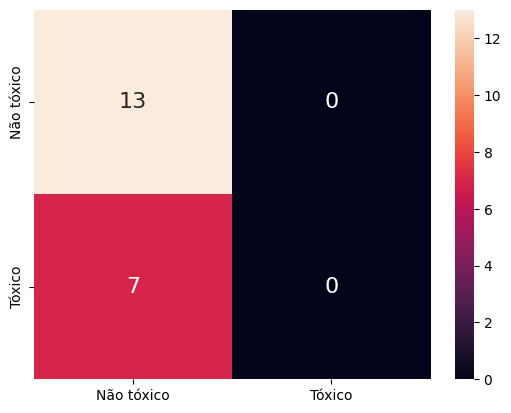

In [44]:
modelo_baseline = DummyClassifier()
modelo_baseline.fit(x_treino, y_treino)
y_previsao = modelo_baseline.predict(x_teste)


matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)

accuracy_baseline = accuracy_score(y_teste, y_previsao)

print(f"Valor de accuracy = {accuracy_baseline}")

## Knn

In [45]:
parametros_otimizados_knn = resultado_knn.params.copy()
pprint(parametros_otimizados_knn)

{'n_neighbors': 5,
 'normalization': 'standard',
 'p': 2,
 'pca_components': 9,
 'treatment': 'pca',
 'weights': 'uniform'}


In [46]:
# Lista de etapas para o pipeline 
steps_knn = []

# Definindo a estratégia de normalização 
normalization_knn = parametros_otimizados_knn["normalization"]
# Adiciona normalização padrão
if normalization_knn == "standard": 
    steps_knn.append(StandardScaler())
# Adiciona normalização por máximos e mínimos
elif normalization_knn == "minmax": 
    steps_knn.append(MinMaxScaler())
# Adiciona normalização por máximo absoluto
elif normalization_knn == "maxabs": 
    steps_knn.append(MaxAbsScaler())

# Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
treatment = parametros_otimizados_knn["treatment"]

# Adiciona tratamento PCA 
if treatment == "pca": 
    # Definindo o número de componentes a serem mantidas pelo pca
    steps_knn.append(PCA(n_components=parametros_otimizados_knn["pca_components"]))


# Tratamento da lista de parametros
parametros_remover = ["normalization", "treatment", "pca_components"]
for param in parametros_remover:
    parametros_otimizados_knn.pop(param, None)


# Instânciando o modelo
modelo_knn = KNeighborsClassifier(**parametros_otimizados_knn)
steps_knn.append(modelo_knn)

# Criando o pipeline
pipeline_knn = make_pipeline(*steps_knn)

In [47]:
kf_knn = StratifiedKFold(5, shuffle=True, random_state=semente)
    
accuracy_knn = cross_val_score(
    pipeline_knn, 
    x_treino, 
    y_treino, 
    scoring="accuracy", 
    cv=kf_knn
    )

media_accuracy_knn = accuracy_knn.mean()

print(f"Valores de accuracy = {accuracy_knn}")
print(f"Valor médio de accuracy = {media_accuracy_knn}")

Valores de accuracy = [0.75       0.77777778 0.86111111 0.68571429 0.71428571]
Valor médio de accuracy = 0.7577777777777778


              precision    recall  f1-score   support

  Não tóxico       0.93      1.00      0.96        13
      Tóxico       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



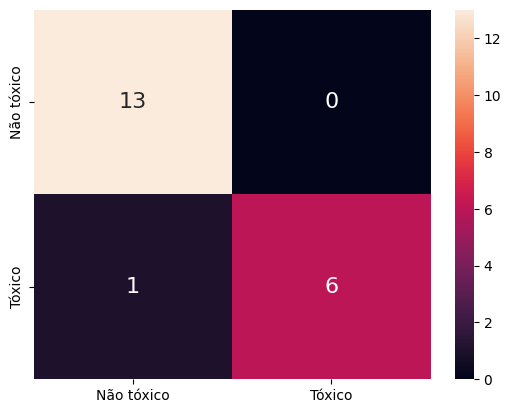

In [48]:
pipeline_knn.fit(x_treino, y_treino)
y_previsao = pipeline_knn.predict(x_teste)

matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)

## SVC

In [49]:
parametros_otimizados_svc = resultado_svc.params.copy()
pprint(parametros_otimizados_svc)

{'C': 789.1080195648531,
 'coef0': 0.4160506093597419,
 'degree': 5,
 'gamma': 'auto',
 'kernel': 'poly',
 'normalization': 'minmax',
 'treatment': None}


In [50]:
# Lista de etapas para o pipeline 
steps_svc = []

# Definindo a estratégia de normalização 
normalization_svc = parametros_otimizados_svc["normalization"]
# Adiciona normalização padrão
if normalization_svc == "standard": 
    steps_svc.append(StandardScaler())
# Adiciona normalização por máximos e mínimos
elif normalization_svc == "minmax": 
    steps_svc.append(MinMaxScaler())
# Adiciona normalização por máximo absoluto
elif normalization_svc == "maxabs": 
    steps_svc.append(MaxAbsScaler())

# Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
treatment = parametros_otimizados_svc["treatment"]

# Adiciona tratamento PCA 
if treatment == "pca": 
    # Definindo o número de componentes a serem mantidas pelo pca
    steps_svc.append(PCA(n_components=parametros_otimizados_svc["pca_components"]))


# Tratamento da lista de parametros
parametros_remover = ["normalization", "treatment", "pca_components"]
for param in parametros_remover:
    parametros_otimizados_svc.pop(param, None)


# Instânciando o modelo
modelo_svc = SVC(**parametros_otimizados_svc)
steps_svc.append(modelo_svc)

# Criando o pipeline
pipeline_svc = make_pipeline(*steps_svc)

In [51]:
kf_svc = StratifiedKFold(5, shuffle=True, random_state=semente)
    
accuracy_svc = cross_val_score(
    pipeline_svc, 
    x_treino, 
    y_treino, 
    scoring="accuracy", 
    cv=kf_svc
    )

media_accuracy_svc = accuracy_svc.mean()

print(f"Valores de accuracy = {accuracy_svc}")
print(f"Valor médio de accuracy = {media_accuracy_svc}")

Valores de accuracy = [0.77777778 0.88888889 0.88888889 0.85714286 0.85714286]
Valor médio de accuracy = 0.8539682539682539


              precision    recall  f1-score   support

  Não tóxico       0.93      1.00      0.96        13
      Tóxico       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



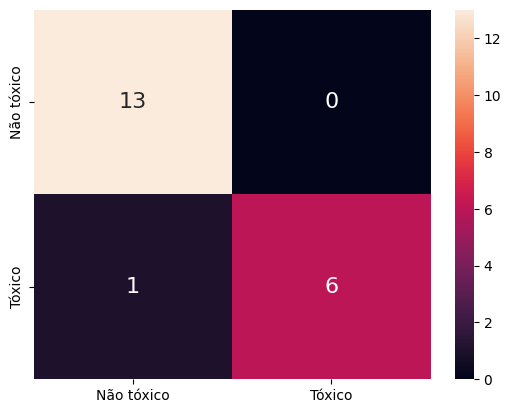

In [52]:
pipeline_svc.fit(x_treino, y_treino)
y_previsao = pipeline_svc.predict(x_teste)

matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)

## Logistic Regression

In [53]:
parametros_otimizados_lrc = resultado_lrc.params.copy()
parametros_otimizados_lrc["solver"] ="liblinear"
parametros_otimizados_lrc["max_iter"] = 5000
parametros_otimizados_lrc["random_state"] = semente

pprint(parametros_otimizados_lrc)


{'C': 0.18354553587797304,
 'class_weight': 'balanced',
 'max_iter': 5000,
 'normalization': 'standard',
 'penalty': 'l1',
 'random_state': 3931421,
 'solver': 'liblinear',
 'treatment': None}


In [54]:
# Lista de etapas para o pipeline 
steps_lrc = []

# Definindo a estratégia de normalização 
normalization_lrc = parametros_otimizados_lrc["normalization"]
# Adiciona normalização padrão
if normalization_lrc == "standard": 
    steps_lrc.append(StandardScaler())
# Adiciona normalização por máximos e mínimos
elif normalization_lrc == "minmax": 
    steps_lrc.append(MinMaxScaler())
# Adiciona normalização por máximo absoluto
elif normalization_lrc == "maxabs": 
    steps_lrc.append(MaxAbsScaler())

# Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
treatment = parametros_otimizados_lrc["treatment"]

# Adiciona tratamento PCA 
if treatment == "pca": 
    # Definindo o número de componentes a serem mantidas pelo pca
    steps_lrc.append(PCA(n_components=parametros_otimizados_lrc["pca_components"]))

# Adiciona tratamento RFE 
elif treatment == "rfe": 

    # Definindo o número de atributos a serem mantidos
    n_features_to_select = parametros_otimizados_lrc["rfe_features"]

    # Tratamento da lista de parametros
    parametros_remover = ["normalization", "treatment", "pca_components", "rfe_features"]
    for param in parametros_remover:
        parametros_otimizados_lrc.pop(param, None)

    # Definindo o estimador 
    estimator = LogisticRegression(**parametros_otimizados_lrc)
    
    steps_lrc.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))


# Tratamento da lista de parametros
parametros_remover = ["normalization", "treatment", "pca_components", "rfe_features"]
for param in parametros_remover:
    parametros_otimizados_lrc.pop(param, None)


# Instânciando o modelo
modelo_lrc = LogisticRegression(**parametros_otimizados_lrc)
steps_lrc.append(modelo_lrc)

# Criando o pipeline
pipeline_lrc = make_pipeline(*steps_lrc)

In [55]:
kf_lrc = StratifiedKFold(5, shuffle=True, random_state=semente)
    
accuracy_lrc = cross_val_score(
    pipeline_lrc, 
    x_treino, 
    y_treino, 
    scoring="accuracy", 
    cv=kf_lrc
    )

media_accuracy_lrc = accuracy_lrc.mean()

print(f"Valores de accuracy = {accuracy_lrc}")
print(f"Valor médio de accuracy = {media_accuracy_lrc}")

Valores de accuracy = [0.86111111 0.83333333 0.94444444 0.8        0.77142857]
Valor médio de accuracy = 0.8420634920634921


              precision    recall  f1-score   support

  Não tóxico       1.00      1.00      1.00        13
      Tóxico       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



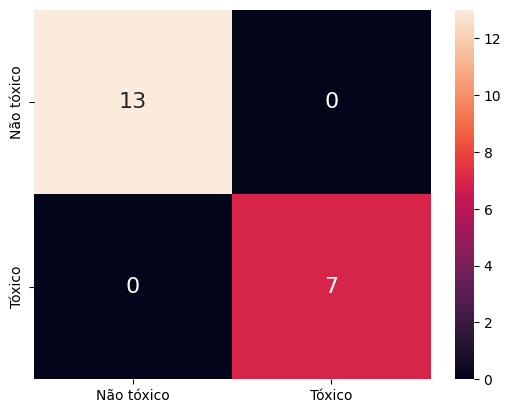

In [56]:
pipeline_lrc.fit(x_treino, y_treino)
y_previsao = pipeline_lrc.predict(x_teste)

matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)

## Decision Tree

In [57]:
parametros_otimizados_dtc = resultado_DecisionTree.params.copy()
parametros_otimizados_dtc["random_state"] = semente

pprint(parametros_otimizados_dtc)

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 0.0530684395557626,
 'min_samples_split': 0.11822332932827617,
 'normalization': None,
 'random_state': 3931421,
 'treatment': None}


In [58]:
# Lista de etapas para o pipeline 
steps_dtc = []

# Definindo a estratégia de normalização 
normalization_dtc = parametros_otimizados_dtc["normalization"]
# Adiciona normalização padrão
if normalization_dtc == "standard": 
    steps_dtc.append(StandardScaler())
# Adiciona normalização por máximos e mínimos
elif normalization_dtc == "minmax": 
    steps_dtc.append(MinMaxScaler())
# Adiciona normalização por máximo absoluto
elif normalization_dtc == "maxabs": 
    steps_dtc.append(MaxAbsScaler())

# Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
treatment = parametros_otimizados_dtc["treatment"]

# Adiciona tratamento PCA 
if treatment == "pca": 
    # Definindo o número de componentes a serem mantidas pelo pca
    steps_dtc.append(PCA(n_components=parametros_otimizados_dtc["pca_components"]))

# Adiciona tratamento RFE 
elif treatment == "rfe": 

    # Definindo o número de atributos a serem mantidos
    n_features_to_select = parametros_otimizados_lrc["rfe_features"]

    # Tratamento da lista de parametros
    parametros_remover = ["normalization", "treatment", "pca_components", "rfe_features"]
    for param in parametros_remover:
        parametros_otimizados_lrc.pop(param, None)

    # Definindo o estimador 
    estimator = DecisionTreeClassifier(**parametros_otimizados_dtc)
    
    steps_lrc.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))

# Tratamento da lista de parametros
parametros_remover = ["normalization", "treatment", "pca_components"]
for param in parametros_remover:
    parametros_otimizados_dtc.pop(param, None)


# Instânciando o modelo
modelo_dtc = DecisionTreeClassifier(**parametros_otimizados_dtc)
steps_dtc.append(modelo_dtc)

# Criando o pipeline
pipeline_dtc = make_pipeline(*steps_dtc)

In [59]:
kf_dtc = StratifiedKFold(5, shuffle=True, random_state=semente)
    
accuracy_dtc = cross_val_score(
    pipeline_dtc, 
    x_treino, 
    y_treino, 
    scoring="accuracy", 
    cv=kf_dtc
    )

media_accuracy_dtc = accuracy_dtc.mean()

print(f"Valores de accuracy = {accuracy_dtc}")
print(f"Valor médio de accuracy = {media_accuracy_dtc}")

Valores de accuracy = [0.69444444 0.94444444 0.88888889 0.74285714 0.8       ]
Valor médio de accuracy = 0.814126984126984


              precision    recall  f1-score   support

  Não tóxico       0.93      1.00      0.96        13
      Tóxico       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



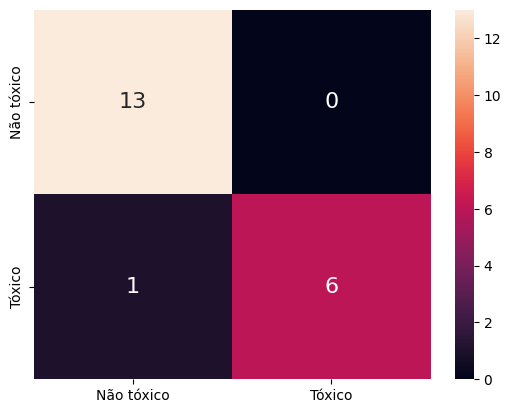

In [60]:
pipeline_dtc.fit(x_treino, y_treino)
y_previsao = pipeline_dtc.predict(x_teste)

matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)

## RandomForest

In [61]:
parametros_otimizados_rfc = resultado_DecisionTree.params.copy()
parametros_otimizados_rfc["random_state"] = semente

pprint(parametros_otimizados_rfc)

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 0.0530684395557626,
 'min_samples_split': 0.11822332932827617,
 'normalization': None,
 'random_state': 3931421,
 'treatment': None}


In [62]:
# Lista de etapas para o pipeline 
steps_rfc = []

# Definindo a estratégia de normalização 
normalization_rfc = parametros_otimizados_rfc["normalization"]
# Adiciona normalização padrão
if normalization_rfc == "standard": 
    steps_rfc.append(StandardScaler())
# Adiciona normalização por máximos e mínimos
elif normalization_rfc == "minmax": 
    steps_rfc.append(MinMaxScaler())
# Adiciona normalização por máximo absoluto
elif normalization_rfc == "maxabs": 
    steps_rfc.append(MaxAbsScaler())

# Definindo estratégia de redução de dimensionalidade ou seleção de atributos 
treatment = parametros_otimizados_rfc["treatment"]

# Adiciona tratamento PCA 
if treatment == "pca": 
    # Definindo o número de componentes a serem mantidas pelo pca
    steps_rfc.append(PCA(n_components=parametros_otimizados_rfc["pca_components"]))

# Adiciona tratamento RFE 
elif treatment == "rfe": 
    # CORREÇÃO: Usar parametros_otimizados_rfc em vez de parametros_otimizados_lrc
    n_features_to_select = parametros_otimizados_rfc["rfe_features"]

    # Fazer uma cópia dos parâmetros para não modificar o original
    params_rfc_copy = parametros_otimizados_rfc.copy()
    
    # Tratamento da lista de parametros
    parametros_remover = ["normalization", "treatment", "pca_components", "rfe_features"]
    for param in parametros_remover:
        params_rfc_copy.pop(param, None)

    # Definindo o estimador 
    estimator = RandomForestClassifier(**params_rfc_copy)
    
    steps_rfc.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))

# Fazer uma cópia dos parâmetros para o modelo final
params_final_rfc = parametros_otimizados_rfc.copy()

# Tratamento da lista de parametros
parametros_remover = ["normalization", "treatment", "pca_components", "rfe_features"]
for param in parametros_remover:
    params_final_rfc.pop(param, None)

# Instânciando o modelo
modelo_rfc = RandomForestClassifier(**params_final_rfc)
steps_rfc.append(modelo_rfc)

# Criando o pipeline
pipeline_rfc = make_pipeline(*steps_rfc)

In [63]:
kf_rfc = StratifiedKFold(5, shuffle=True, random_state=semente)
    
accuracy_rfc = cross_val_score(
    pipeline_rfc, 
    x_treino, 
    y_treino, 
    scoring="accuracy", 
    cv=kf_rfc
)

media_accuracy_rfc = accuracy_rfc.mean()

print(f"Valores de accuracy = {accuracy_rfc}")
print(f"Valor médio de accuracy = {media_accuracy_rfc}")

Valores de accuracy = [0.83333333 0.88888889 0.86111111 0.82857143 0.82857143]
Valor médio de accuracy = 0.8480952380952381


              precision    recall  f1-score   support

  Não tóxico       0.93      1.00      0.96        13
      Tóxico       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



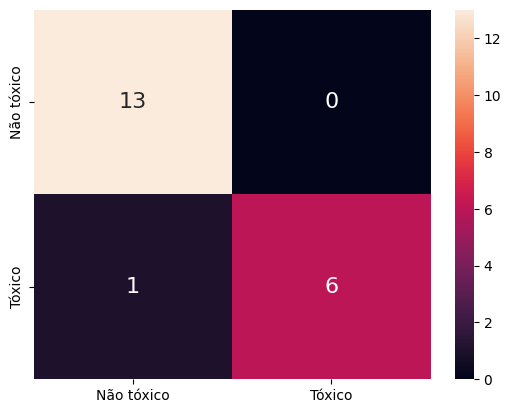

In [64]:
pipeline_rfc.fit(x_treino, y_treino)
y_previsao = pipeline_rfc.predict(x_teste)

matriz_conf = confusion_matrix(y_teste, y_previsao, labels=[0, 1])
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

print(
    classification_report(
        y_teste,
        y_previsao,
        target_names=ordem_labels,
        zero_division=0,
    )
)


# Resultados e Conclusões

# Referências

- Documentação DecisionTree:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- Documentação RandomForest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
